In [1]:
import sys
sys.path.insert(0, "..")

# MTCNN PNet

This notebook demonstrates the PNet architecture and its corresponding weights.

PNet is a fully convolutional neural network (CNN) used in the first stage of MTCNN. This network processes inputs of variable size and generates bounding box proposals. It produces two outputs:

* Regression of the bounding box coordinates within the convolutional receptive field.
* Classification of the receptive field into two categories: no-face or face.

The outputs are generated for each receptive field, meaning that with every convolutional pass, a corresponding output is produced.

In the following sections, we will run the MTCNN model, focusing solely on the PNet stage. We will examine the intermediate inputs, observe the output shapes, and visualize the results.

## MTCNN on PNet Stage

MTCNN can be configured to run only up to the first stage, which will provide the direct output of the PNet stage.

In [2]:
from mtcnn import MTCNN
from mtcnn.utils.images import load_image
from mtcnn.utils.tensorflow import set_gpu_memory_growth
from mtcnn.stages import StagePNet

2024-10-03 01:12:14.796761: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-03 01:12:14.807198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 01:12:14.820051: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 01:12:14.823925: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 01:12:14.833451: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# To avoid using excessive GPU memory (In case of using GPU)
set_gpu_memory_growth()

In [4]:
image = load_image("../resources/ivan.jpg")

2024-10-03 01:12:16.346034: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1312 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:65:00.0, compute capability: 8.6
2024-10-03 01:12:16.346452: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7363 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:17:00.0, compute capability: 6.1


In [5]:
mtcnn = MTCNN(stages=[StagePNet], device="CPU:0")    # other devices: GPU:0  ,  GPU:1  , ...

In [6]:
%%time
result = mtcnn.detect_faces(image, postprocess=True)

CPU times: user 440 ms, sys: 92.9 ms, total: 533 ms
Wall time: 311 ms


In [7]:
result

[{'box': [270, 89, 61, 61], 'confidence': 0.9999668598175049},
 {'box': [271, 89, 71, 71], 'confidence': 0.9997212290763855},
 {'box': [490, 209, 54, 54], 'confidence': 0.9992153644561768},
 {'box': [187, 243, 38, 38], 'confidence': 0.998630166053772},
 {'box': [480, 285, 57, 57], 'confidence': 0.9982782602310181},
 {'box': [296, 100, 32, 32], 'confidence': 0.9957242012023926},
 {'box': [192, 43, 108, 108], 'confidence': 0.9916715025901794},
 {'box': [101, 408, 42, 42], 'confidence': 0.9912404417991638},
 {'box': [97, 405, 52, 52], 'confidence': 0.9852192401885986},
 {'box': [11, 180, 43, 43], 'confidence': 0.9849668145179749},
 {'box': [8, 386, 31, 31], 'confidence': 0.9844192862510681},
 {'box': [394, 399, 48, 48], 'confidence': 0.9816769361495972},
 {'box': [14, 313, 40, 40], 'confidence': 0.9804034233093262},
 {'box': [184, 59, 18, 18], 'confidence': 0.9791208505630493},
 {'box': [495, 143, 58, 58], 'confidence': 0.9790045022964478},
 {'box': [286, 218, 62, 62], 'confidence': 0.976

The output of the processing is a set of bounding boxes along with a confidence score. We can see a plot of the output in the following cell:

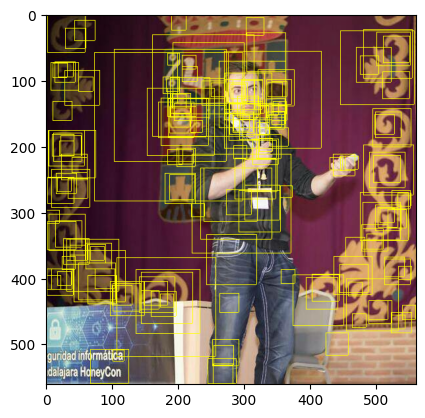

In [8]:
from mtcnn.utils.plotting import plot
import matplotlib.pyplot as plt

plt.imshow(plot(image, result))

As can be seen, the PNet is proposing several bounding boxes, which must be "refined" to discard those that do not fit. This is part of the RNet functionality.

### Accessing PNet's model

The network can be accessed by instantiating StagePNet and reading the attribute `model`, which is a TensorFlow model.

In [9]:
stage = StagePNet()
model = stage.model

In [10]:
model.summary()

Model: "p_net_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, None, None, 10) │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu1 (PReLU)                  │ (None, None, None, 10) │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling1 (MaxPooling2D)      │ (None, None, None, 10) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, None, None, 16) │         1,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu2 (PReLU)                  │ (None, None, None, 16) │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, None, None, 32) │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prelu3 (PReLU)                  │ (None, None, None, 32) │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4-1 (Conv2D)                │ (None, None, None, 4)  │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4-2 (Conv2D)                │ (None, None, None, 2)  │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,632 (25.91 KB)

 Trainable params: 6,632 (25.91 KB)

 Non-trainable params: 0 (0.00 B)

### Loading PNet's weights

The model weights are stored within the folder local `mtcnn/assets/weights/` under the filename `pnet.lz4`. It can be loaded with `joblib`.

In [11]:
import joblib

pnet_weights = joblib.load("../mtcnn/assets/weights/pnet.lz4")

In [12]:
len(pnet_weights)

13

In [13]:
[w.shape for w in pnet_weights]

[(3, 3, 3, 10),
 (10,),
 (1, 1, 10),
 (3, 3, 10, 16),
 (16,),
 (1, 1, 16),
 (3, 3, 16, 32),
 (32,),
 (1, 1, 32),
 (1, 1, 32, 4),
 (4,),
 (1, 1, 32, 2),
 (2,)]

Further stage ablation can be performed by looking at `mtcnn/stages/stage_pnet.py`